<a href="https://colab.research.google.com/github/Zadak-H/Alzheimer-detection-and-classification-Using-Deep-Learning/blob/main/Alzheimer_detection_and_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problem Definition**

>*Alzheimer is known the most for the causes of dementia. It takes 2/3 of the whole dementia popilation, while the cause is still unknown. According to papers from Lancet neurology, even the old theory such as neural inflations, which was disregarded as the cause compared to tau-protein, beta-amiloids, and genetic factors (Apo E4).*


Before I start, I'll have to explain a bit more about the Alzheimer, because, the data contains 4 classes of Alzheimer that depends on the severity of dementia.

There are degrees of severity in Alzheimer.

*   Very mildly demented : This is the stage where patient starts to forget where they put their stuff, other people's names recently, etc. It is hard to detect through cognitive ability test.

*   Mildly demented : This is the stage where patients don't remember the words, can't find their way to the destination, loss of focus and work-abilities. This is also the stage where patients even forget that they are losing memory. From this stage, with cognitive testing, it can be found.

*   Moderately demented : Starts to forget the recent activities, important old histories, have hard time calculating the budget, hard to go outside alone, and loss of empathy.

There are 3 more stages in the moderately dementia, which in the terminal stage, the patient can't move on their own, while they lose the ability to speak. But I assume that the current dataset from Kaggle [https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset] is considering all the these stages merged inside 'Moderately demeted' or not even considered.

Knowing these stages are important because the faster the stage the patient is at, the treatment will have higher effect in terms of slowing the process. If the dementia is found during the moderately demented stage, it is known that the patient will pass away in 3 years. (One of the reported case is a rythm guitarists Malcom from the band AC/DC was diagnosed severe dementia at 2014.)

Thus, having an AI that detects alzheimer dementia in the early stage can allow longer life expactancy from the patient as well as higher life quality overall from the slowdown of dementia.

As Alzheimer can not only be found with cognitive ability testing, but also through MRI or CT by looking at the ventricles of the brain and cortical atrophy, the theoratical foundation on this project is solid. Doctors find the patient with Alzheimer's have a brain that have enlarged ventricles (that lies in the center of the brain) as well as thinner cortical grey area of the brain.

# **2. Solution Specification**


> *This project will go through various Deep Learning models from Convolutional Neural Network models using reLU for Detection and Classification.
In this Project I will use GANs for Superresolution the images and then I will use GANs for Synthetic Image generation For getting more test and train images.*

# **Lets Start The coding Part**

### *Import dataFrom Google Drive*

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
import os
# Set Directory path for Dataset
os.chdir("/content/gdrive/MyDrive/Project_folder/")
root_path = "/content/gdrive/MyDrive/Project_folder/"
Dataset='Dataset'
Data_Dir=os.listdir(Dataset)
print(Data_Dir)

['Non_Demented', 'Moderate_Demented', 'Very_Mild_Demented', 'Mild_Demented']


In [11]:
list = os.listdir("Dataset/Non_Demented/") # dir is your directory path
Non_Demented = len(list)
print("Non_Demented -> " + str(Non_Demented))

list = os.listdir("Dataset/Moderate_Demented/") # dir is your directory path
Moderate_Demented = len(list)
print("Moderate_Demented -> " + str(Moderate_Demented))

list = os.listdir("Dataset/Very_Mild_Demented/") # dir is your directory path
Very_Mild_Demented = len(list)
print("Very_Mild_Demented -> " + str(Very_Mild_Demented))

list = os.listdir("Dataset/Mild_Demented/") # dir is your directory path
Mild_Demented = len(list)
print("Mild_Demented -> " + str(Mild_Demented))

Non_Demented -> 3200
Moderate_Demented -> 64
Very_Mild_Demented -> 2240
Mild_Demented -> 1352


# **Import Libaries**

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

## *Dataset Load*

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('./Dataset', output="output", seed=1345, ratio=(.8, 0.1,0.1)) 

### Data Preprocessing

In [14]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 7475 files belonging to 4 classes.
Found 1843 files belonging to 4 classes.
Found 1852 files belonging to 4 classes.


In [15]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

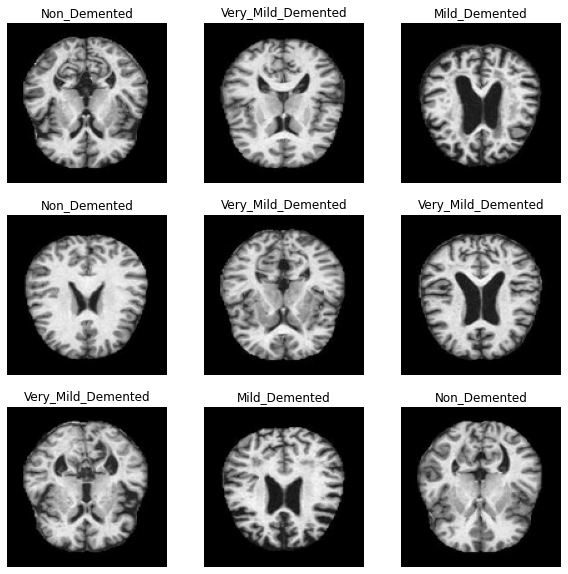

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show>

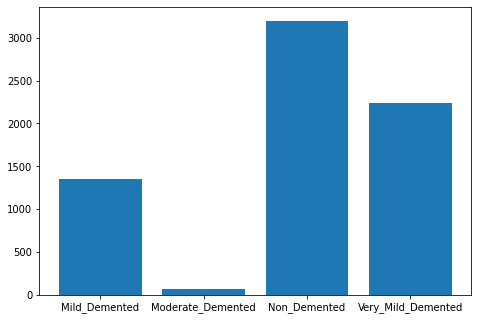

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [Mild_Demented, Moderate_Demented, Non_Demented, Very_Mild_Demented]
ax.bar(class_names,size)
plt.show

# **Model - CNN**

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax"))

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

### *Plot Model*

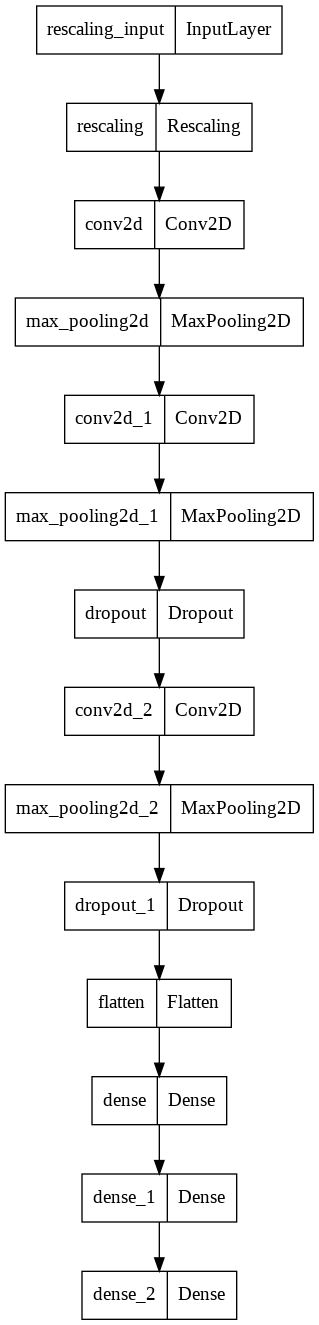

In [21]:
# Plot the model
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='Alzheimer_detection_architecture.png')

In [22]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=100, batch_size=64, verbose=1)

Epoch 1/100
117/117 [==============================] - 831s 7s/step - loss: 1.1991 - accuracy: 0.4293 - val_loss: 1.0192 - val_accuracy: 0.5815
Epoch 2/100
117/117 [==============================] - 11s 94ms/step - loss: 0.9516 - accuracy: 0.5544 - val_loss: 0.8646 - val_accuracy: 0.6172
Epoch 3/100
117/117 [==============================] - 11s 93ms/step - loss: 0.8524 - accuracy: 0.6124 - val_loss: 0.8067 - val_accuracy: 0.5967
Epoch 4/100
117/117 [==============================] - 11s 94ms/step - loss: 0.7134 - accuracy: 0.6936 - val_loss: 0.5567 - val_accuracy: 0.7959
Epoch 5/100
117/117 [==============================] - 11s 92ms/step - loss: 0.5393 - accuracy: 0.7794 - val_loss: 0.3852 - val_accuracy: 0.8834
Epoch 6/100
117/117 [==============================] - 11s 91ms/step - loss: 0.3894 - accuracy: 0.8388 - val_loss: 0.2248 - val_accuracy: 0.9471
Epoch 7/100
117/117 [==============================] - 11s 93ms/step - loss: 0.2749 - accuracy: 0.8920 - val_loss: 0.1285 - val_acc

## **Plot results**

In [23]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

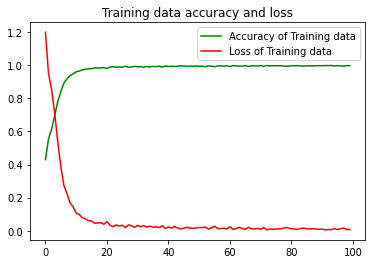

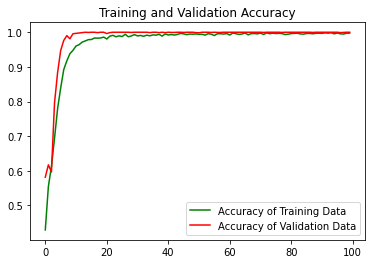

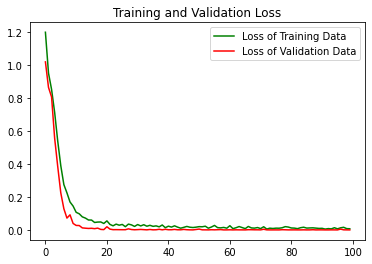

<Figure size 432x288 with 0 Axes>

In [24]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Prediction**

In [25]:
loss, accuracy = model.evaluate(test_ds)

29/29 [==============================] - 211s 5s/step - loss: 1.4687e-04 - accuracy: 1.0000


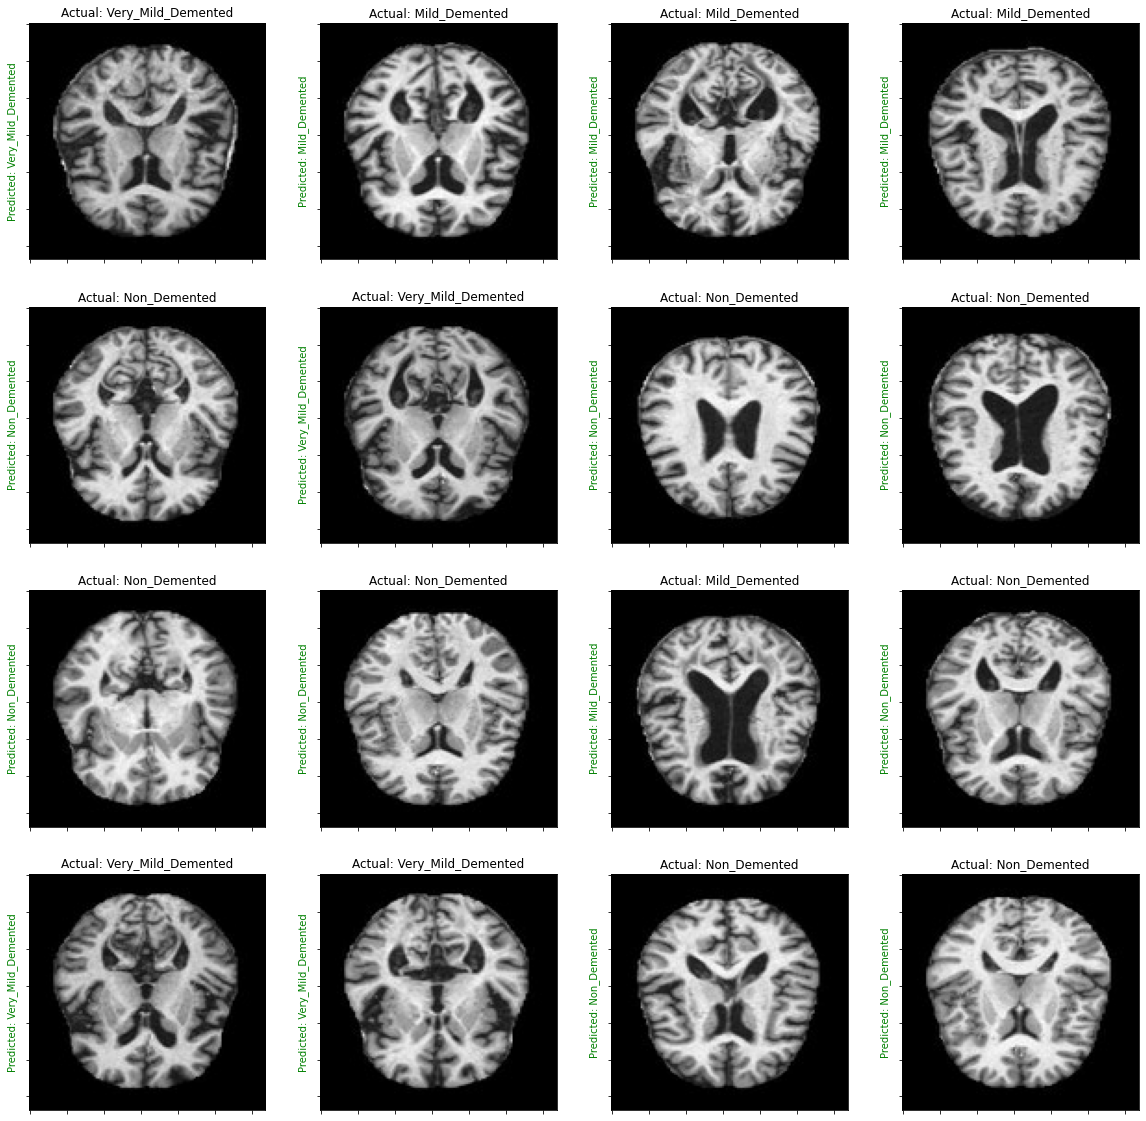

In [26]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])